In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from scipy.optimize import curve_fit

In [2]:
# define the font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

In [ ]:
#k-means, sample size
records = pd.DataFrame.from_csv('data/part2_1.csv')

In [ ]:
records.head()

In [ ]:
records['x'] = records.index
records.columns = ['Time', 'Sample Size']
records.reset_index(drop = True, inplace=True)
#records.head()

In [ ]:
#ADD trend line
x=records.loc[:, 'Sample Size']
y=records.loc[:, 'Time']

In [ ]:
import math
b,c = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b*x + c, '-')

In [ ]:
def func(x, a, b, c):
    return a*x**2 +b*x + c

parameters, cov = curve_fit(func, x, y)
parameters

plt.plot(x, y, '.')
x_new = np.linspace(x.min(), x.max(), 1000)
plt.plot(x_new, func(x_new, *parameters), color = 'black') 

func(1000000, *parameters)

In [ ]:
# exponential fit

def exponential_func(x, a, b, c):
    return a*np.exp(b*x)+c

parameters, cov = curve_fit(exponential_func, x, y, p0=(1, 1e-6, 1))

plt.plot(x, y, '.')
x_new = np.linspace(x.min(), x.max(), 1000)
plt.plot(x_new, exponential_func(x_new, *parameters), color = 'black') 


In [ ]:
m*1000000 + b

In [ ]:
fig, ax = plt.subplots(figsize=[8,10])
ax.set_xlabel('Number of Samples', fontproperties=label_font)
ax.set_ylabel('Processing Time (seconds)', fontproperties=label_font)
#ax.set_ylim([0, 20])
#ax.set_xlim([0, 120000])
#ax.set_axis_bgcolor(axis_bgcolor) 
#ax.yaxis.grid(True)
ax.scatter(x=list(records['Sample Size']), y=list(records['Time']), c='steelblue', edgecolor='', s=50, alpha=1)
ax.set_title('Computational Time as A Function of Sample Size with Mini-batch K Means')
#ax.plot(x, m*x + b, '-',color='grey')
#plt.savefig('part21aminibatchkmeans.png')

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

f.set_size_inches(20, 12)
#ax1.set_xlabel('Number of Samples', fontproperties=label_font)
ax1.set_ylabel('Processing Time (seconds)', fontproperties=label_font)
#ax.set_ylim([0, 20])
#ax.set_xlim([0, 120000])
#ax.set_axis_bgcolor(axis_bgcolor) 
#ax.yaxis.grid(True)
ax1.set_axis_bgcolor('steelblue') 
ax1.scatter(x=list(records['Sample Size']), y=list(records['Time']), c='white', edgecolor='', s=50, alpha=1)
ax1.set_title('Computational Time as A Function of Sample Size with K-Means (n_clusters = 100)')
#ax.plot(x, m*x + b, '-',color='grey')


# ax+b fit
ax2.scatter(x=list(records['Sample Size']), y=list(records['Time']), c='steelblue', edgecolor='', s=50, alpha=1)
b,c = np.polyfit(x, y, 1)
ax2.plot(x, b*x + c, '-', color='white', linewidth = 2.5)
ax2.set_axis_bgcolor('ghostwhite')  
ax2.set_title('Fitted with polynomial degree = 1 (100M sample estimated time: {})'.format("{0:.2f}".format(b*1000000 + c)))


# ax^2 + bx + c fit
ax3.scatter(x=list(records['Sample Size']), y=list(records['Time']), c='steelblue', edgecolor='', s=50, alpha=1)
def func(x, a, b, c):
    return a*x**2 +b*x + c
parameters, cov = curve_fit(func, x, y)
x_new = np.linspace(x.min(), x.max(), 2000)
ax3.plot(x_new, func(x_new, *parameters), '-', linewidth = 2.5, color='white')
ax3.set_axis_bgcolor('ghostwhite')
ax3.set_title('Fitted with polynomial degree = 2 (100M sample estimated time: {})'.format("{0:.2f}".format(func(1000000, *parameters))))
ax3.set_ylabel('Processing Time (seconds)', fontproperties=label_font)
ax3.set_xlabel('Sample Size', fontproperties=label_font)


# exponential fit
ax4.scatter(x=list(records['Sample Size']), y=list(records['Time']), c='steelblue', edgecolor='', s=50, alpha=1)
def exponential_func(x, a, b, c):
    return a*np.exp(b*x)+c
parameters, cov = curve_fit(exponential_func, x, y, p0=(1, 1e-6, 1))
x_new = np.linspace(x.min(), x.max(), 2000)
ax4.plot(x_new, exponential_func(x_new, *parameters), color = 'white',linewidth = 2.5) 
ax4.set_axis_bgcolor('ghostwhite')
ax4.set_title('Fitted with exponential function (100M sample estimated time: {})'.format("{0:.2f}".format(exponential_func(1000000, *parameters))))
ax4.set_xlabel('Sample Size', fontproperties=label_font)

#plt.savefig('part2KmeansEstimation.png')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

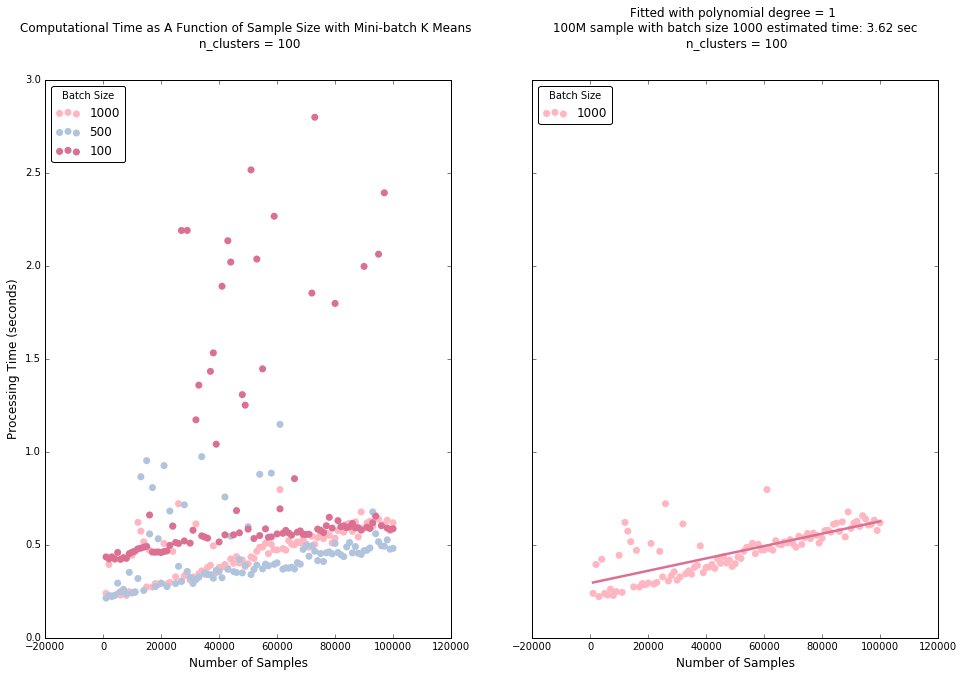

In [6]:
#minibatch, sample size
colors = ['lightpink','lightsteelblue','palevioletred']

fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey='row', figsize = [16,10])                        
ax1.set_xlabel('Number of Samples', fontproperties=label_font)
ax2.set_xlabel('Number of Samples', fontproperties=label_font)
ax1.set_ylabel('Processing Time (seconds)', fontproperties=label_font)
#ax.set_ylim([0, 20])
#ax.set_xlim([0, 120000])
#ax.set_axis_bgcolor(axis_bgcolor) 
#ax.yaxis.grid(True)

for percentage, color in zip([0.01,0.005,0.001], colors):
    
    records = pd.DataFrame.from_csv('data/part2_1_a_MiniBatchK_{}.csv'.format(str(percentage)))
    records['x'] = records.index
    records.columns = ['Time', 'Sample Size']
    records.reset_index(drop = True, inplace=True)

    ax1.scatter(x=list(records['Sample Size']), y=list(records['Time']), 
               c=color, edgecolor='', s=50, alpha=1, label = '{}'.format(str(int(percentage*100000))))
    
    if percentage == 0.01:
        ax2.scatter(x=list(records['Sample Size']), y=list(records['Time']), 
               c=color, edgecolor='', s=50, alpha=1, label = '{}'.format(str(int(percentage*100000))))
        x=list(records['Sample Size'])
        y=list(records['Time'])
        b,c = np.polyfit(x, y, 1)
        x_new = np.linspace(min(x), max(x), 1000)
        ax2.plot(x_new, b*x_new + c, '-', linewidth=2.5, color = 'palevioletred')

        

ax1.set_title('Computational Time as A Function of Sample Size with Mini-batch K Means \n n_clusters = 100', y = 1.05)

ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=1, shadow=False, title="Batch Size", fancybox=True)

ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=1, shadow=False, title="Batch Size", fancybox=True)
ax2.set_title('Fitted with polynomial degree = 1 \n 100M sample with batch size 1000 estimated time: {} sec \n n_clusters = 100'.format("{0:.2f}".format(b*1000000+c)),
             y=1.05)

plt.savefig('part21MinibatchKmeansEstimate.png')

In [9]:
from mpl_toolkits.mplot3d import Axes3D

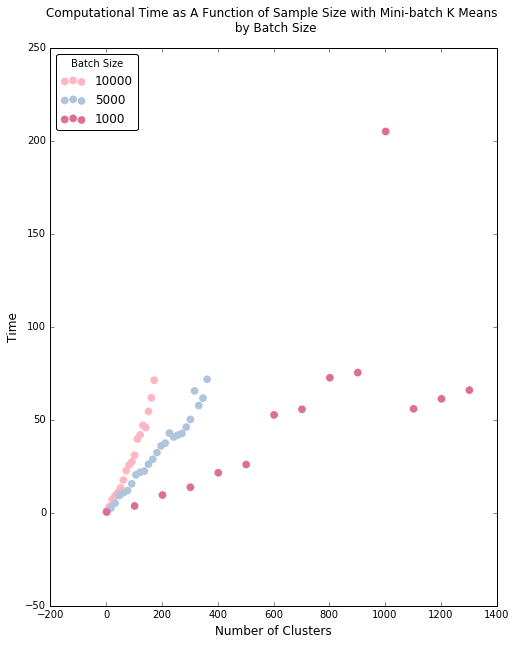

In [65]:
#minibatch, sample size
colors = ['lightpink','lightsteelblue','palevioletred']

fig,ax = plt.subplots(1, 1, figsize = [8,10]) 

ax.set_xlabel('Number of Clusters', fontproperties=label_font)
ax.set_ylabel('Time', fontproperties=label_font)
ax.set_title('Computational Time as A Function of Sample Size with Mini-batch K Means \n by Batch Size', y = 1.02)

for percentage, color in zip([0.1,0.05, 0.01], colors):
    
    records = pd.DataFrame.from_csv('data/part21MiniBatchKCluster_{}.csv'.format(str(percentage)))
    records['x'] = records.index
    records.columns = ['Time', 'Num_Clusters']
    records.reset_index(drop = True, inplace=True)

    ax.scatter(records['Num_Clusters'], records['Time'],
               c=color, s=60, edgecolor='', alpha=1, label = '{}'.format(str(int(percentage*100000))))

ax.legend(loc="upper left", bbox_to_anchor=[0,1],ncol=1, shadow=False, title="Batch Size", fancybox=True)
plt.savefig('part21MinibatchKmeansCluster.png')

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

In [85]:
records = pd.DataFrame.from_csv('data/part2DBSCAN.csv')

records['x'] = records.index
records.columns = ['Time', 'Sample Size']
records.reset_index(drop = True, inplace=True)
#records.head()

In [88]:
func(1000000,*parameters)

15.454720674449627

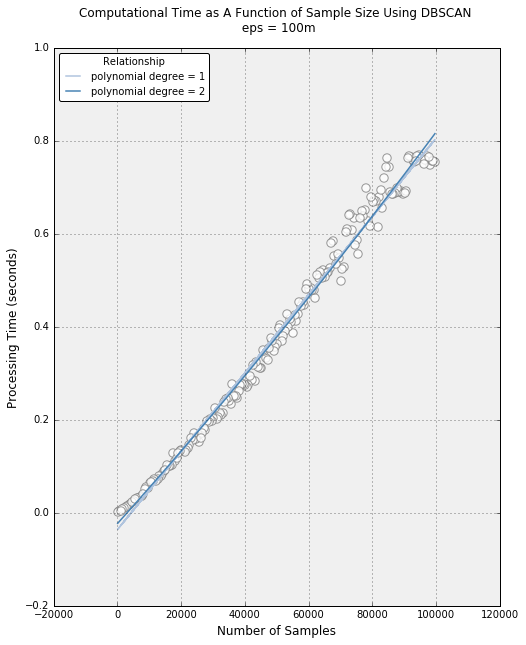

In [89]:
fig, ax = plt.subplots(figsize=[8,10])
ax.set_axis_bgcolor(axis_bgcolor) 
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xlabel('Number of Samples', fontproperties=label_font)
ax.set_ylabel('Processing Time (seconds)', fontproperties=label_font)
ax.scatter(x=list(records['Sample Size']), y=list(records['Time']), c='white', edgecolor='grey', s=70, alpha=0.8)
ax.set_title('Computational Time as A Function of Sample Size Using DBSCAN \n eps = 100m', y=1.02)
x=records['Sample Size']
y=records['Time']
m,b=np.polyfit(x,y,1)
ax.plot(x, m*x + b, '-',color='lightsteelblue', linewidth=1.5, label='polynomial degree = 1')

def func(x, a, b, c):
    return a*x**2 +b*x + c

parameters, cov = curve_fit(func, x, y)
x_new = np.linspace(x.min(), x.max(), 1000)
ax.plot(x_new, func(x_new, *parameters), color = 'steelblue', linewidth=1.5, label='polynomial degree = 2') 

ax.legend(loc="upper left", bbox_to_anchor=[0,1], ncol=1, shadow=False, title="Relationship", fancybox=True, prop={'size':10})
plt.savefig('part22DBSCAN.png')

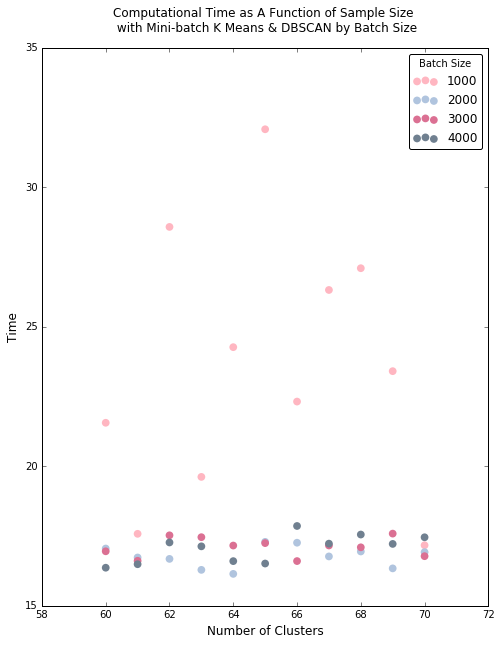

In [95]:
#minibatch, sample size
colors = ['lightpink','lightsteelblue','palevioletred','slategrey']

fig,ax = plt.subplots(1, 1, figsize = [8,10]) 

ax.set_xlabel('Number of Clusters', fontproperties=label_font)
ax.set_ylabel('Time', fontproperties=label_font)
ax.set_title('Computational Time as A Function of Sample Size \n with Mini-batch K Means & DBSCAN by Batch Size', y = 1.02)

for percentage, color in zip([0.001,0.002, 0.003,0.004], colors):
    
    records = pd.DataFrame.from_csv('data/par3_3_perc{}.csv'.format(str(percentage)))

    ax.scatter(records['Num_Clusters'], records['Time'],
               c=color, s=60, edgecolor='', alpha=1, label = '{}'.format(str(int(percentage*1000000))))

ax.legend(loc="upper right", bbox_to_anchor=[1,1],ncol=1, shadow=False, title="Batch Size", fancybox=True)
plt.savefig('CEE-263N-Scalable-Spatial-Analytics/images/Assignment 1/part3_step3.png')